# Tick 2

## Code

### Initialization

In [3]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
rng = np.random.default_rng(0)

In [4]:
import os.path
if os.path.exists('covid_global_20201213.csv'):
    print('file already downloaded!')
else:
    !wget "https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/covid_global_20201213.csv"

file already downloaded!


In [5]:
covdata = pandas.read_csv('covid_global_20201213.csv')

## Part a

### Question 1

In [6]:
covid = covdata[~pandas.isna(covdata.Population)]

### Question 2

In [7]:
ans2 = covdata[pandas.isna(covdata.Population)]\
    .loc[:, ['Country/Region', 'Province/State']].drop_duplicates()

### Question 3

In [8]:
ans3 = covid.loc[covid['Country/Region']=='United Kingdom']\
.groupby('Province/State', dropna=False).apply(len)

### Question 4

In [9]:
uknodep = covid.loc[covid['Country/Region']=='United Kingdom']\
.loc[pandas.isna(covid['Province/State'])]

uknodep['Date'] = pandas.to_datetime(uknodep['Date'])

uknodep['new_confirmed'] = uknodep['Confirmed']\
.transform(lambda x : x.diff())

uknodep['new_deaths'] = uknodep['Deaths']\
.transform(lambda x : x.diff())

uknodep['smooth_new_confirmed'] = uknodep['new_confirmed']\
.transform(lambda x : x.rolling(7).mean())

ans4 = uknodep

### Question 5

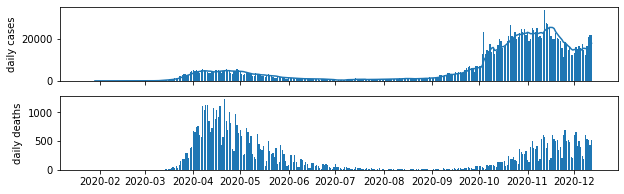

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 3))

ax1.plot(ans4['Date'], ans4['smooth_new_confirmed'])
ax1.bar(ans4['Date'], ans4['new_confirmed'])
ax1.set_ylabel('daily cases')

ax2.bar(ans4['Date'], ans4['new_deaths'])
ax2.set_ylabel('daily deaths')
plt.show()

### Question 6

In [11]:
provinces = covid[['Country/Region', 'Province/State']]
# provinces = provinces.drop_duplicates()
# provinces['provinces'] = provinces\
#     .groupby('Country/Region').transform(len)

provinces = provinces.drop_duplicates().dropna()

provinces['provinces'] = provinces\
    .groupby('Country/Region').transform(len)

provinces = provinces.drop_duplicates('Country/Region')\
    [provinces.provinces > 1]

provinces1 = covid[['Country/Region', 'Province/State']]

provinces1['metropole'] = provinces1.groupby('Country/Region')\
    .transform(lambda x: x.isnull().values.any().astype(int))

provinces1 = provinces1.drop_duplicates('Country/Region')

finalprov = provinces.merge(provinces1, on='Country/Region')

finalprov = finalprov.loc[:, ['Country/Region', 'metropole', 'provinces']]

ans6 = finalprov

ans6['Country/Region']

<ipython-input-11-f30a34c35981>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  provinces = provinces.drop_duplicates('Country/Region')\
<ipython-input-11-f30a34c35981>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provinces1['metropole'] = provinces1.groupby('Country/Region')\


0         Australia
1            Canada
2             China
3           Denmark
4            France
5       Netherlands
6    United Kingdom
Name: Country/Region, dtype: object

### Question 7

In [12]:
if os.path.exists('covid_countries_20201213.csv'):
    print('file already downloaded!')
else:
    !wget "https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/covid_countries_20201213.csv"
    
newcountries = pandas.read_csv('covid_countries_20201213.csv')

newcountries['Population'] = newcountries.groupby('Country_Region')\
    ['Population'].transform(max)

newcountries = newcountries[['Country_Region', 'Population', 'iso3']]

file already downloaded!


In [13]:
newdf = covid.copy()

addprovs = ['Australia', 'Canada', 'China']

newdf = newdf.loc[newdf['Country/Region'].isin(addprovs)]

newdf = newdf.dropna()

newdf[['Confirmed', 'Deaths', 'Population']] = \
    newdf.groupby(['Date', 'Country/Region'])\
    [['Confirmed', 'Deaths', 'Population']].transform(sum)

del newdf['Province/State']

newdf = newdf.drop_duplicates(['Date', 'Country/Region'])

addprovs = newdf

In [14]:
newdf = covid.copy()

keepnan = ['Denmark', 'France', 'Netherlands', 'United Kingdom']

newdf = newdf.loc[newdf['Country/Region'].isin(keepnan)]

newdf = newdf[newdf['Province/State'].isna()]

keepnan = newdf

newdf = covid.copy()

keep = ['Australia', 'Canada', 'China', 'Denmark', 
        'France', 'Netherlands', 'United Kingdom']

newdf = newdf.loc[~newdf['Country/Region'].isin(keep)]

covidc = pandas.concat([newdf, keepnan, addprovs])

del covidc['Province/State']

covidc['Date'] = pandas.to_datetime(covidc['Date'])

covidc = covidc.sort_values(['Country/Region', 'Date'])

newcountries = newcountries.drop_duplicates(['Country_Region'])

newcountries = newcountries.rename(columns=
                                   {'Country_Region': 
                                    'Country/Region'}) 

del covidc['Population']

del covidc['iso3']

covidc = covidc.merge(newcountries, on='Country/Region')

In [15]:
covidc = covidc.sort_values(['Country/Region', 'Date'])

## Part b

### Question 8

In [16]:
ans8 = covidc[['Country/Region', 'Confirmed', 'Deaths']]\
    .groupby('Country/Region')[['Confirmed', 'Deaths']]\
    .apply(max).reset_index()

### Question 9

In [17]:
upto = covidc[covidc['Date'] == '2020-07-14']
after = covidc[covidc['Date'] > '2020-07-14']

upto = upto[['Country/Region', 'Confirmed', 'Deaths']]\
    .groupby('Country/Region')[['Confirmed', 'Deaths']]\
    .apply(max).reset_index()

after = after[['Country/Region', 'Confirmed', 'Deaths']]\
    .groupby('Country/Region')[['Confirmed', 'Deaths']]\
    .apply(max).reset_index()

upto = upto.rename(columns={'Confirmed': 'Confirmed1', 
                            'Deaths': 'Deaths1'})
after = after.rename(columns={'Confirmed': 'Confirmed2', 
                              'Deaths': 'Deaths2'})

ans9 = upto.merge(after, on='Country/Region')

ans9['Deaths2'] = ans9['Deaths2'] - ans9['Deaths1']

ans9['Confirmed2'] = ans9['Confirmed2'] - ans9['Confirmed1']

ans9['case_multiplier'] = (ans9['Deaths1'] / ans9['Confirmed1']) / \
    (ans9['Deaths2'] / ans9['Confirmed2'])

### Question 10

In [18]:
ans10 = covidc.copy()

ans10 = ans10.merge(ans9[['Country/Region', 
                  'case_multiplier']], on='Country/Region')

ans10['new_confirmed'] = ans10.groupby(['Country/Region'])\
    ['Confirmed'].transform(lambda x : x.diff())

ans10.loc[ans10['Date'] <= '2020-07-14', ['new_confirmed']] = \
    ans10['new_confirmed'] * ans10['case_multiplier']

ans10['smooth_new_confirmed'] = ans10.groupby(['Country/Region'])\
    ['new_confirmed'].transform(lambda x : x.rolling(7).mean())

ans10['infected'] = ans10.groupby(['Country/Region'])\
    ['smooth_new_confirmed'].transform(lambda x : x.rolling(10).sum())

ans10['inc'] = ans10.groupby(['Country/Region'])\
    ['infected'].transform(lambda x : x.pct_change() + 1)

ans10['R'] = 10 * (ans10['inc'] - 1) + 1

### Question 11

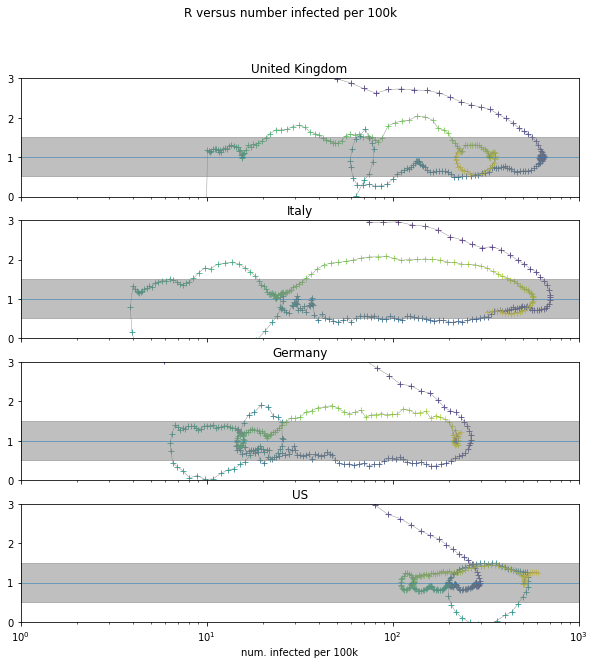

In [22]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True,
                                         figsize=(10,10))

ax4.set_xlabel('num. infected per 100k')
ax4.set_xscale('log')
plt.setp((ax1, ax2, ax3, ax4), xlim=(1, 10**3),ylim=(0, 3))

fig.suptitle('R versus number infected per 100k')

for (ax, country) in zip([ax1, ax2, ax3, ax4],
                         ['United Kingdom', 'Italy', 'Germany', 'US']):
    countrydata = ans10.loc[(ans10['Country/Region'] == country)]
    ax.set_title(country)
    ax.scatter(
            countrydata['infected']/
            (countrydata['Population']/100000), countrydata['R'],
            marker = '+', c=range(len(countrydata['infected'])), 
            linewidth = 0.8)
    ax.plot(
        countrydata['infected']/
        (countrydata['Population']/100000), countrydata['R'],
        linewidth=0.4, color='grey')
    ax.axhline(y=1, linewidth = 0.5)
    ax.axhspan(10 * (0.5**(1/14)-1)+1, 10 * (2**(1/14)-1)+1, alpha=0.5, color='grey')
    
plt.show()

## Answer Submission

## Part a

### Initialize Autograder

In [25]:
import ucamcl
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp').subsection('tick2a')

Waiting for you to log in .. done.


### Question 1

In [26]:
num_rows = len(covid)
GRADER.submit_answer(GRADER.fetch_question('q1'), num_rows)

Correct!


True

### Question 2

In [27]:
GRADER.submit_answer(GRADER.fetch_question('q2'), ans2)

Correct!


True

### Question 3

In [28]:
GRADER.submit_answer(GRADER.fetch_question('q3'), 
                     ans3.reset_index(name='n'))

Correct!


True

### Question 4

In [29]:
q = GRADER.fetch_question('q4')
want = pandas.DataFrame(q.rows).assign(Date=lambda df: pandas.to_datetime(df.Date))
submit = ans4.merge(want)[q.want_cols].assign(Date=lambda df: df.Date.astype(str))
GRADER.submit_answer(q, submit)

Correct!


True

### Question 6

In [30]:
GRADER.submit_answer(GRADER.fetch_question('q6'), ans6)

Correct!


True

### Question 7

In [31]:
q = GRADER.fetch_question('q7')
want = pandas.DataFrame(q.rows).assign(Date=lambda df: pandas.to_datetime(df.Date))
submit = covidc.merge(want)[q.want_cols].assign(Date=lambda df: df.Date.astype(str))
GRADER.submit_answer(q, {'num_rows': len(covidc), 'details': submit})

Correct!


True

## Part b

### Initialise Autograder

In [122]:
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp').subsection('tick2b')

Waiting for you to log in .. done.


### Question 8

In [123]:
q = GRADER.fetch_question('q8')
submit = pandas.DataFrame(q.rows).merge(ans8)[q.want_cols]
GRADER.submit_answer(q, submit)

Correct!


True

### Question 9

In [124]:
q = GRADER.fetch_question('q9')
submit = pandas.DataFrame(q.rows).merge(ans9)[q.want_cols]
GRADER.submit_answer(q, submit)

Correct!


True

### Question 10

In [23]:
q = GRADER.fetch_question('q10')
want = pandas.DataFrame(q.rows).assign(Date=lambda df: pandas.to_datetime(df.Date))
submit = ans10.merge(want)[q.want_cols].assign(Date=lambda df: df.Date.astype(str))
GRADER.submit_answer(q, submit)

NameError: name 'GRADER' is not defined